Name : Seena Abdul

Project : E-commerce Shipping Data

** Objective**

 The data set contains information regarding the product shipment tracking like the warhouse details,customer rating, product importance and whether the product has reached on time or it. The objective of the data analysis is to find the relationship between these data and how it affects the product delivery.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Problem Statement

This data of Product Shipment Tracking, answer instantly to your questions:

  •	What was Customer Rating? And was the product delivered on time?

  •	Is Customer query is being answered?

  •	If Product importance is high. having highest rating or being delivered on time?

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.tree import plot_tree,DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


# 2. Understanding the data

In [ ]:
df=pd.read_csv(r"/content/drive/MyDrive/Colab Notebooks/Careerera Assignments/Train.csv")

In [ ]:
df.shape      # Gives the no of rows and columns

(10999, 12)

In [ ]:
df.head()    # shows how the data look like

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [ ]:
df.info()  # Gives column names and the data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [ ]:
df.dtypes    # to understand the datatypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

In [ ]:
df1=df.drop(columns="ID")

In [ ]:
df1

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...
10994,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,C,Ship,5,4,242,5,low,F,4,1155,0
10997,F,Ship,5,2,223,6,medium,M,2,1210,0


In [ ]:
# seperating categorical & numerical variables
cat=df1.dtypes[df1.dtypes=="object"].index
num=df1.dtypes[df1.dtypes!="object"].index

In [ ]:
cat

Index(['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'], dtype='object')

In [ ]:
data_cat=df1[cat]  # cat variables into a dataframe
data_num=df1[num]  # num variable into a dataframe

In [ ]:
data_cat

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
0,D,Flight,low,F
1,F,Flight,low,M
2,A,Flight,low,M
3,B,Flight,medium,M
4,C,Flight,medium,F
...,...,...,...,...
10994,A,Ship,medium,F
10995,B,Ship,medium,F
10996,C,Ship,low,F
10997,F,Ship,medium,M


In [ ]:
for i in range(0,len(cat)):
  print(f"No of categories in {cat[i]} : {df1[cat[i]].nunique()}")


No of categories in Warehouse_block : 5
No of categories in Mode_of_Shipment : 3
No of categories in Product_importance : 3
No of categories in Gender : 2


##  Summary of Step 2 : Understanding the data

*   10,999 rows
*   12 columns
*   7 numercial variables (excluding the ID)
*   4 categorical variable (Warehouse block,Mode of Shipment,Product Important Gender)
*   Warehouse block has 5 categories
*   Mode of Shipment has 3 categories
*   Product Importance has 3 categories
*   Gender has 2 categories




# 3. EDA(Univariate,Bivariate and Multivariate Analysis)

## Finding the Missing value

In [ ]:
df1.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

## Univariate Analysis on Numerical variable (Mean,Std,Min,Max and percentiles)

In [ ]:
df1.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [ ]:
for i in range(0,len(cat)):
  print(f"{df1[cat[i]].value_counts()}")
  print(f"The sum is {df1[cat[i]].value_counts().sum()}")
  print()

F    3666
D    1834
A    1833
B    1833
C    1833
Name: Warehouse_block, dtype: int64
The sum is 10999

Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64
The sum is 10999

low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64
The sum is 10999

F    5545
M    5454
Name: Gender, dtype: int64
The sum is 10999



### Visualising the numerical variable using Histogram and Box plot

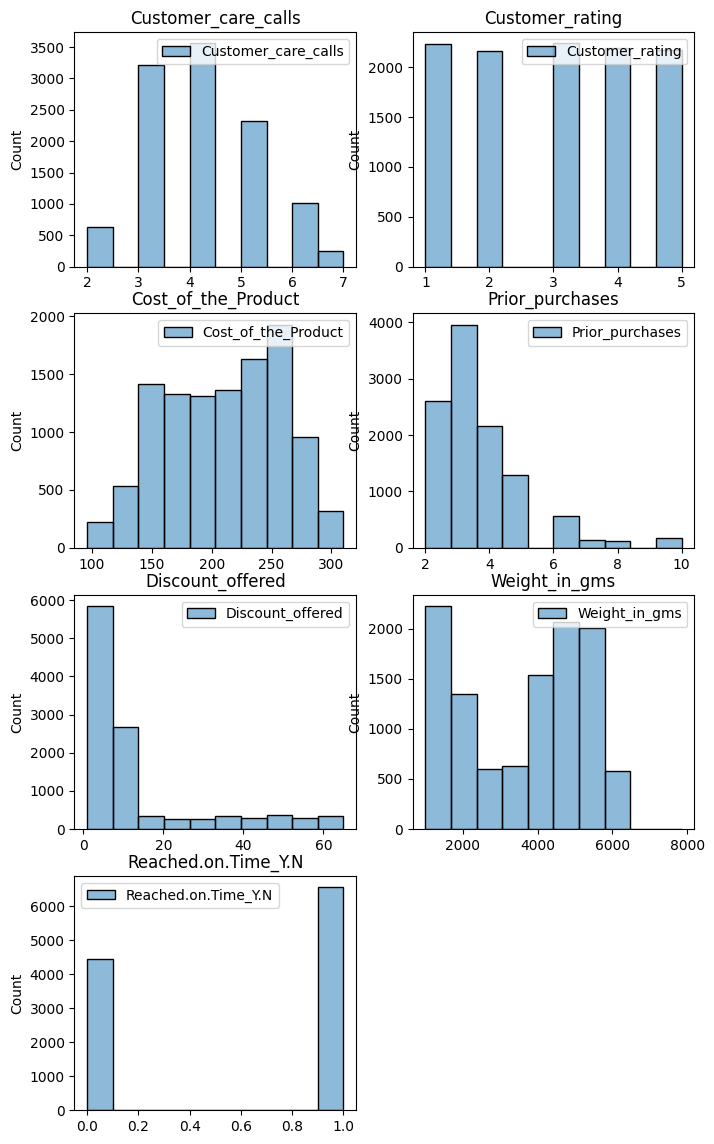

In [ ]:
import math
col=2
row=(len(num)/col)
rows=math.ceil(row)
plt.figure(figsize = (8, 14))
for i in range(0,len(num)):
  p=i+1
  ax=plt.subplot(rows,col,p)
  sns.histplot([data_num[num[i]]],bins=10)
  plt.title(num[i])
  print()
plt.show()

### Finding outliers by Visualising the numerical variable using boxplot

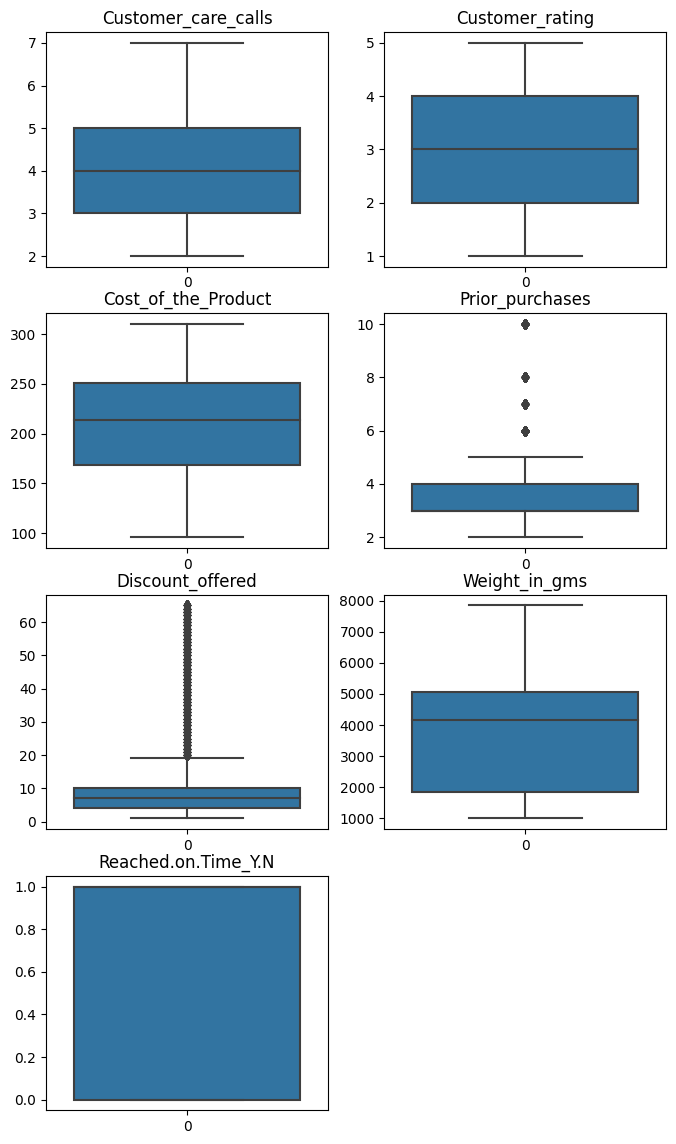

In [ ]:
import math
col=2
row=(len(num)/col)
rows=math.ceil(row)
plt.figure(figsize = (8, 14))
for i in range(0,len(num)):
  p=i+1
  ax=plt.subplot(rows,col,p)
  sns.boxplot([data_num[num[i]]])
  plt.title(num[i])
  print()
plt.show()

## Univariate Analysis on Categorical variable

### Visualising the categorical variable using countplot and pie plot

2


<function matplotlib.pyplot.show(close=None, block=None)>

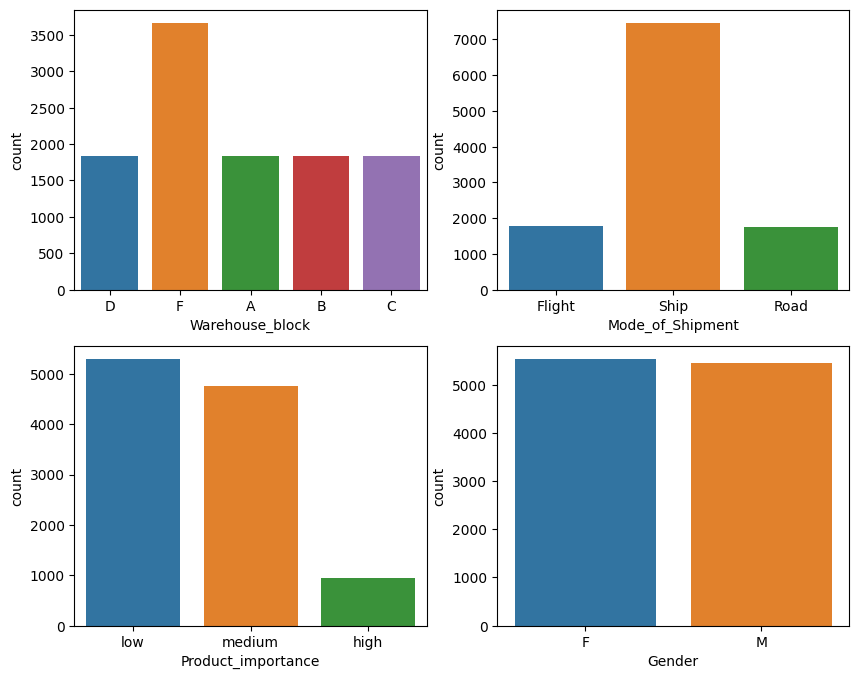

In [ ]:
import math
col=2
row=(len(cat)/col)
rows=math.ceil(row)
print(rows)
plt.figure(figsize = (10, 8))
for i in range(0,len(cat)):
  p=i+1
  ax=plt.subplot(rows,col,p)
  sns.countplot(x=cat[i],data=data_cat,ax=ax)
plt.show

2


<function matplotlib.pyplot.show(close=None, block=None)>

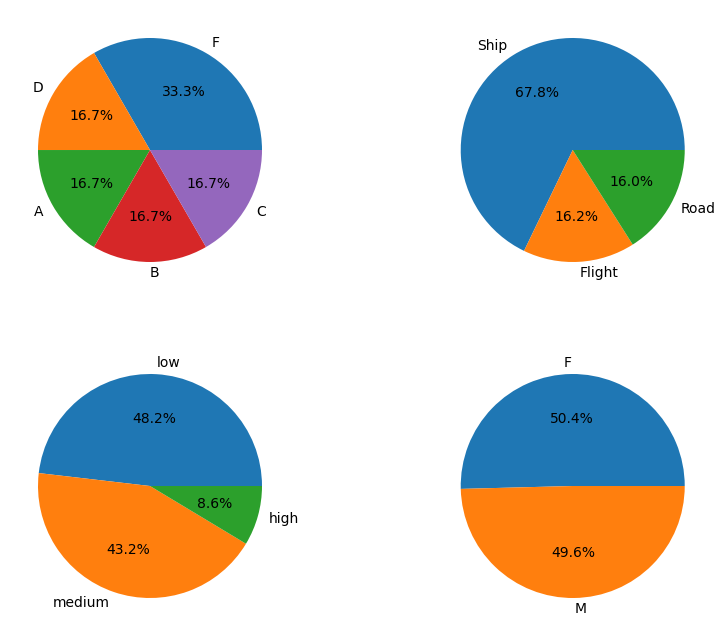

In [ ]:
import math
col=2
row=(len(cat)/col)
rows=math.ceil(row)
print(rows)
plt.figure(figsize = (10, 8))
for i in range(0,len(cat)):
  p=i+1
  ax=plt.subplot(rows,col,p)
  plt.pie(df1[cat[i]].value_counts(),labels=df1[cat[i]].value_counts().index,autopct="%1.1f%%")
plt.show

## Bivariate Analysis

### Customer Rating VS Product delivered on time

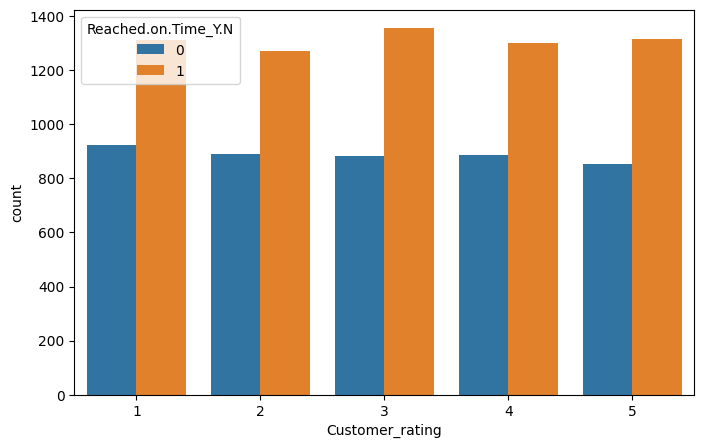

In [ ]:
# customer rating vs Product delivered on time ( Both are categorical variable-can be visualied best on clustered bar graph)
plt.figure(figsize=(8,5))
sns.countplot(x="Customer_rating",data=df1,hue="Reached.on.Time_Y.N")
plt.show()

In [ ]:
# customer rating vs reached on time ( Both are categorical variable-can be visualied best on cross tab)
pd.crosstab(df1["Customer_rating"],df1["Reached.on.Time_Y.N"],normalize='index')

Reached.on.Time_Y.N,0,1
Customer_rating,,
1,0.412528,0.587472
2,0.412009,0.587991
3,0.393926,0.606074
4,0.404751,0.595249
5,0.393367,0.606633


In [ ]:
# Above crosstabe indicates
  # Products with Customer rating of 3 & above most likely not to reach on time

### Product Importance VS Product delivered on time

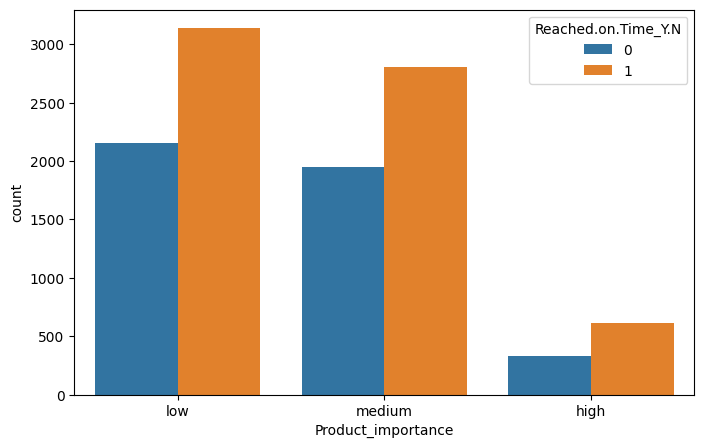

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x="Product_importance",data=df1,hue="Reached.on.Time_Y.N")
plt.show()

In [ ]:
pd.crosstab(df1["Product_importance"],df1["Reached.on.Time_Y.N"],normalize='index')

Reached.on.Time_Y.N,0,1
Product_importance,,
high,0.350211,0.649789
low,0.407212,0.592788
medium,0.409550,0.590450


In [ ]:
# Above crosstabe indicates
  # Higher the product importance indicate products most likely didnot reach on time

In [ ]:
# Product Importance VS Rating

### Product Importance VS Customer Rating

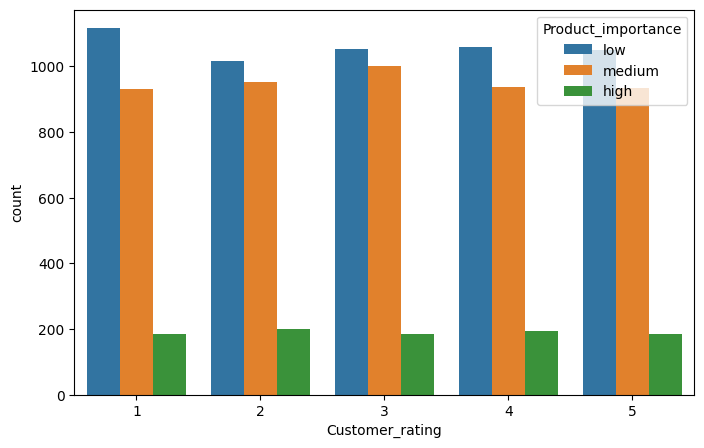

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x="Customer_rating",data=df1,hue="Product_importance")
plt.show()

In [ ]:
pd.crosstab(df1['Customer_rating'],df1["Product_importance"],normalize="index")

Product_importance,high,low,medium
Customer_rating,,,
1,0.083221,0.499776,0.417002
2,0.091917,0.468822,0.439261
3,0.082180,0.470746,0.447075
4,0.088168,0.484239,0.427593
5,0.085675,0.484109,0.430216


In [ ]:
# Above cross tab indicates
 #Products with high importance are more likely to receive a customer rating of 2
 #Products with low importance are more likely to receive a customer rating of 1
 #Products with medium importance are more likely to receive customer ratings of 2 or 3.


## Multivariate Analaysis

<ipython-input-29-3284acc9f2a2>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cr=df1.corr()


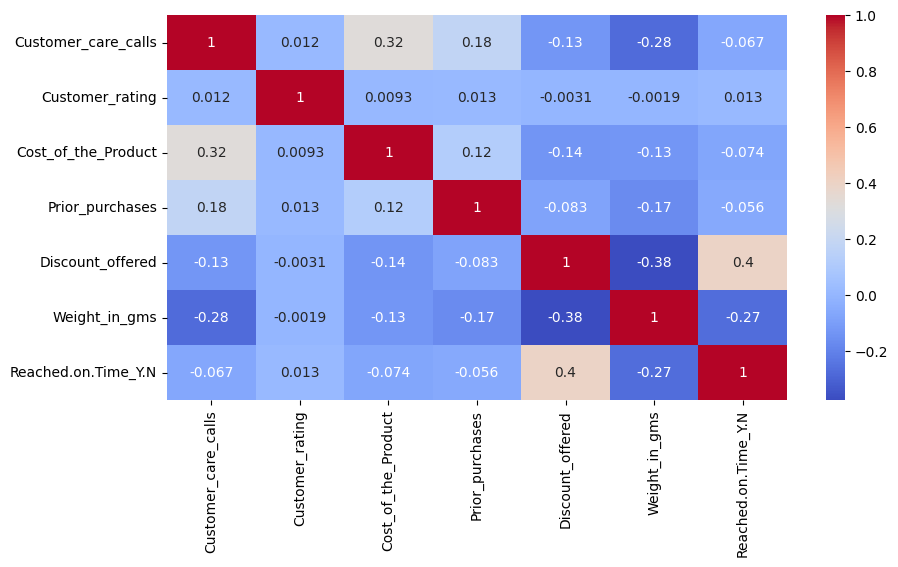

In [ ]:
cr=df1.corr()
plt.figure(figsize=(10,5))
  sns.heatmap(cr,cmap='coolwarm',annot=True)
plt.show()

In [ ]:
# Discount offered show a remarkable relation with Reached on time
# Categorical and continous (Visualise using box plot)

<Axes: xlabel='Reached.on.Time_Y.N', ylabel='Discount_offered'>

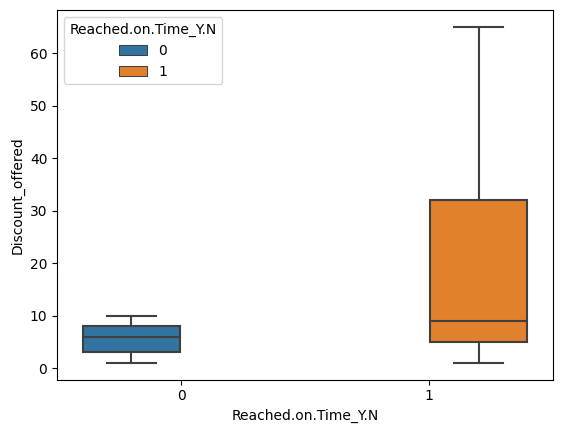

In [ ]:
sns.boxplot(x="Reached.on.Time_Y.N",y="Discount_offered",data=df1,hue="Reached.on.Time_Y.N")

## Summary of step 3 : EDA

*   There are no missing values
*   Outliers found in Discount offered and prior purchases
*   Most used Mode of Shipment is by Ship
*   Product importance are mostly high and medium,very less high
*   Maximum Products are stored in Warehouse F
*   Products with Customer rating of 3 & above most likely not to reach on time
*   Products with high importance are more likely to receive a customer rating of 2
* Products with low importance are more likely to receive a customer rating of 1
* Products with medium importance are more likely to receive customer ratings of 2 or 3.
*   Discount offered show a remarkable relation with Reached on time
* More discount indicate more like it didnot reach on time


# 4. Feature Engineering

## Fill Missing Values -Not Applicable

In [ ]:
# No missing values

## Dummy Creation

In [ ]:
df_dum=pd.get_dummies(df1,columns=cat,drop_first=True)

In [ ]:
df_dum

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_low,Product_importance_medium,Gender_M
0,4,2,177,3,44,1233,1,0,0,1,0,0,0,1,0,0
1,4,5,216,2,59,3088,1,0,0,0,1,0,0,1,0,1
2,2,2,183,4,48,3374,1,0,0,0,0,0,0,1,0,1
3,3,3,176,4,10,1177,1,1,0,0,0,0,0,0,1,1
4,2,2,184,3,46,2484,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,4,1,252,5,1,1538,1,0,0,0,0,0,1,0,1,0
10995,4,1,232,5,6,1247,0,1,0,0,0,0,1,0,1,0
10996,5,4,242,5,4,1155,0,0,1,0,0,0,1,1,0,0
10997,5,2,223,6,2,1210,0,0,0,0,1,0,1,0,1,1


##Outlier treatment


<Axes: ylabel='Prior_purchases'>

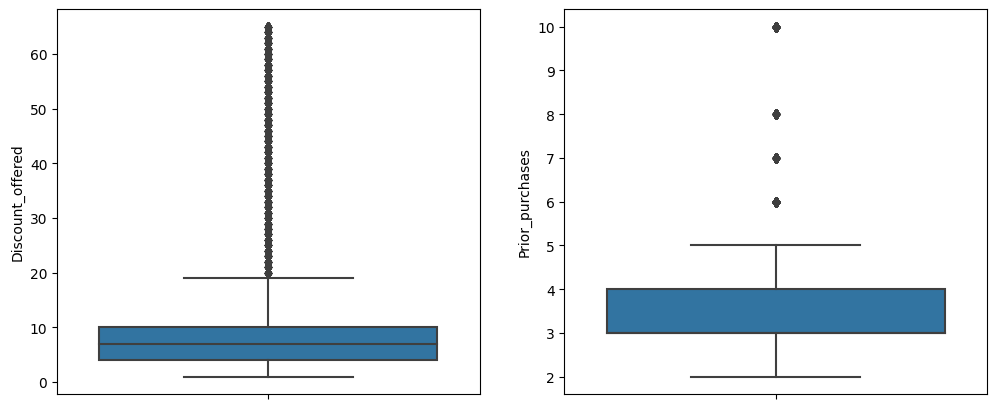

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(data=df_dum,y="Discount_offered")
plt.subplot(1,2,2)
sns.boxplot(data=df_dum,y="Prior_purchases")

In [ ]:
# Outliers exists for Discount_offered and Prior_purchases

In [ ]:
def outlier_capping(x):
 x=x.clip(upper=x.quantile(0.90))
 x=x.clip(lower=x.quantile(0.05))
 return x


<Axes: ylabel='Prior_purchases'>

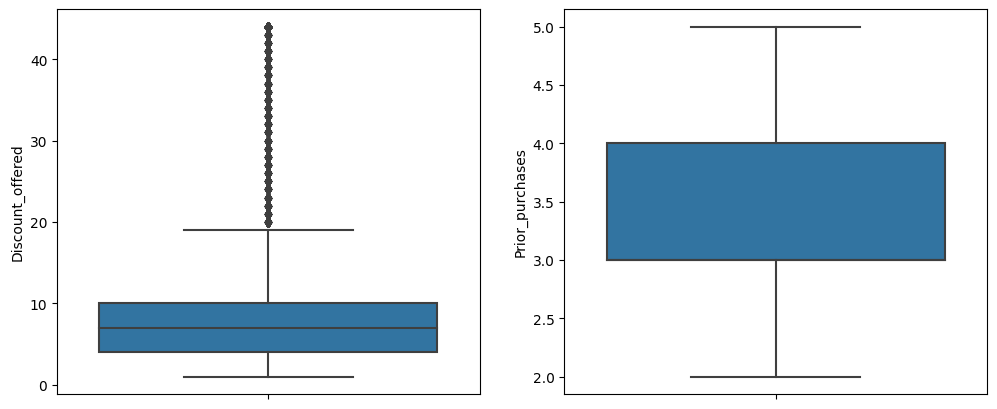

In [ ]:
data_cap=df_dum.apply(outlier_capping)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(data=data_cap,y="Discount_offered")
plt.subplot(1,2,2)
sns.boxplot(data=data_cap,y="Prior_purchases")

In [ ]:
# After outlier clipping Outliers clipped for Prior purchases ,but Discount_offered still got outliers

In [ ]:
data_cap.shape

(10999, 20)

In [ ]:
# IQR method for replacing outliers with mean value

In [ ]:
Q3=data_cap["Discount_offered"].quantile(0.75)
Q1=data_cap["Discount_offered"].quantile(0.25)
IQR=Q3-Q1
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR
data_cap["Discount_offered"]=np.where(data_cap["Discount_offered"]>=upper_limit,data_cap["Discount_offered"].mean(),data_cap["Discount_offered"])

In [ ]:
data_cap


In [ ]:
sns.boxplot(data=data_cap,y="Discount_offered")

In [ ]:
data_cap[num[1]]

0        2
1        5
2        2
3        3
4        2
        ..
10994    1
10995    1
10996    4
10997    2
10998    5
Name: Customer_rating, Length: 10999, dtype: int64

In [ ]:
# Check for normal distribution

# Model Creation

##  Logistic Regression

In [ ]:
# x and Y variable

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x1=data_cap.drop(columns="Reached.on.Time_Y.N")
y1=data_cap["Reached.on.Time_Y.N"]

In [ ]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.33,random_state=0)

###1. Create model





In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [ ]:
logR=LogisticRegression(max_iter=10000)
logR.fit(x1_train,y1_train)

LogisticRegression(max_iter=10000)

### Evaluate Model

In [ ]:
print("Train Accuracy", logR.score(x1_train,y1_train))
print("Test Accuracy", logR.score(x1_test,y1_test))


Train Accuracy 0.6407925091599945
Test Accuracy 0.6258953168044077


In [ ]:
predicted_logtest=logR.predict(x1_test)
predicted_logtrain=logR.predict(x1_train)

In [ ]:
print(metrics.classification_report(y1_test,predicted_logtest))


              precision    recall  f1-score   support

           0       0.56      0.48      0.51      1506
           1       0.66      0.73      0.70      2124

    accuracy                           0.63      3630
   macro avg       0.61      0.60      0.61      3630
weighted avg       0.62      0.63      0.62      3630



## 2. Decision Tree

### Create model

In [ ]:
from sklearn.tree import DecisionTreeClassifier


In [ ]:
dt_model=DecisionTreeClassifier()

In [ ]:
dt_model.fit(x1_train,y1_train)

DecisionTreeClassifier()

In [ ]:
dt_model.score(x1_test,y1_test)

0.6515151515151515

In [ ]:
dt_model.score(x1_train,y1_train)

0.9998642963767133

In [ ]:
predicted_dttest=dt_model.predict(x1_test)

In [ ]:
predicted_dttrain=dt_model.predict(x1_train)

### Evaluate Model

In [ ]:
print(metrics.classification_report(y1_test,predicted_dttest))

              precision    recall  f1-score   support

           0       0.58      0.56      0.57      1506
           1       0.70      0.72      0.71      2124

    accuracy                           0.65      3630
   macro avg       0.64      0.64      0.64      3630
weighted avg       0.65      0.65      0.65      3630



In [ ]:
print(metrics.classification_report(y1_train,predicted_dttrain))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2930
           1       1.00      1.00      1.00      4439

    accuracy                           1.00      7369
   macro avg       1.00      1.00      1.00      7369
weighted avg       1.00      1.00      1.00      7369



In [ ]:
## overfitting -Noticed major difference in f1 score for Train data and Test data and hence hyper parameter tuning is required

### Hyper Parameter tuning

In [ ]:
# Use Grid search method to find the best parameter


In [ ]:
parameters={"criterion":["gini","entropy"],
           "max_depth":[3,4,5,6,7],
           "min_samples_split":[10,15,20,25],
           "min_samples_leaf":[5,10,20,30]}

In [ ]:
dt=DecisionTreeClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
gsearch=GridSearchCV(estimator=dt,param_grid=parameters,cv=5,n_jobs=1)

In [ ]:
gsearch

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7],
                         'min_samples_leaf': [5, 10, 20, 30],
                         'min_samples_split': [10, 15, 20, 25]})

In [ ]:
gsearch.fit(x1_train,y1_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7],
                         'min_samples_leaf': [5, 10, 20, 30],
                         'min_samples_split': [10, 15, 20, 25]})

In [ ]:
gsearch.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 30,
 'min_samples_split': 10}

In [ ]:
dtmodel_1=DecisionTreeClassifier(criterion='gini',max_depth= 6,min_samples_leaf=5,min_samples_split=10)

In [ ]:
dtmodel_1.fit(x1_train,y1_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=5, min_samples_split=10)

In [ ]:
dtmodel_1.score(x1_train,y1_train)

0.6916813678925228

In [ ]:
dtmodel_1.score(x1_test,y1_test)

0.6895316804407714

In [ ]:
predicted_dt_test=dtmodel_1.predict(x1_test)

In [ ]:
predicted_dt_train=dtmodel_1.predict(x1_train)

In [ ]:
print(metrics.classification_report(y1_test,predicted_dt_test))

              precision    recall  f1-score   support

           0       0.58      0.94      0.72      1506
           1       0.93      0.51      0.66      2124

    accuracy                           0.69      3630
   macro avg       0.75      0.73      0.69      3630
weighted avg       0.78      0.69      0.68      3630



In [ ]:
print(metrics.classification_report(y1_train,predicted_dt_train))

              precision    recall  f1-score   support

           0       0.57      0.96      0.71      2930
           1       0.95      0.52      0.67      4439

    accuracy                           0.69      7369
   macro avg       0.76      0.74      0.69      7369
weighted avg       0.80      0.69      0.69      7369



In [ ]:
rmse=np.sqrt(mean_squared_error(y1_test,predicted_dt_test))
rmse

0.5571968409451266

## 3. KNN

### Create Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier(n_neighbors=15)

In [ ]:
knn.fit(x1_train,y1_train)

KNeighborsClassifier(n_neighbors=15)

### Evaluate Model

In [ ]:
knn.score(x1_train,y1_train)

0.7271000135703624

In [ ]:
knn.score(x1_test,y1_test)

0.6424242424242425

### Hyper Parameter tuning

In [ ]:
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.metrics import mean_squared_error

In [ ]:
knn1=KNeighborsClassifier()



In [ ]:
parameters={"n_neighbors":[1,3,5,7,9,11,25,30,50,60]}

In [ ]:
gsearch=GridSearchCV(estimator=knn1,param_grid=parameters,cv=5,n_jobs=1)

In [ ]:
gsearch.fit(x1_train,y1_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=1,
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 25, 30, 50, 60]})

In [ ]:
gsearch.best_params_

{'n_neighbors': 50}

In [ ]:
knn2=KNeighborsClassifier(n_neighbors=60)

In [ ]:
knn2.fit(x1_train,y1_train)


KNeighborsClassifier(n_neighbors=60)

In [ ]:
knn2.score(x1_train,y1_train)

0.691545664269236

In [ ]:
knn2.score(x1_test,y1_test)

0.6776859504132231

In [ ]:
predicted_knntest=knn2.predict(x1_test)
predicted_knntrain=knn2.predict(x1_train)

In [ ]:
print(metrics.classification_report(y1_train,predicted_knntrain))


              precision    recall  f1-score   support

           0       0.58      0.84      0.69      2930
           1       0.85      0.59      0.70      4439

    accuracy                           0.69      7369
   macro avg       0.71      0.72      0.69      7369
weighted avg       0.74      0.69      0.69      7369



In [ ]:
print(metrics.classification_report(y1_test,predicted_knntest))

              precision    recall  f1-score   support

           0       0.58      0.81      0.68      1506
           1       0.81      0.58      0.68      2124

    accuracy                           0.68      3630
   macro avg       0.70      0.70      0.68      3630
weighted avg       0.72      0.68      0.68      3630



In [ ]:
rmse=np.sqrt(mean_squared_error(y1_test,predicted_knntest))
rmse

0.5677270907634907

## SVM

### Create Model

In [ ]:
from sklearn.svm import SVC

In [ ]:
SV=SVC()

In [ ]:
SV.fit(x1_train,y1_train)

SVC()

### Evaluate Model

In [ ]:
SV.score(x1_train,y1_train)

0.6601981272899986

In [ ]:
SV.score(x1_test,y1_test)

0.6539944903581267

In [ ]:
predicted_svtest=SV.predict(x1_test)

In [ ]:
predicted_svtrain=SV.predict(x1_train)

In [ ]:
print(metrics.classification_report(y1_train,predicted_svtrain))

              precision    recall  f1-score   support

           0       0.57      0.58      0.57      2930
           1       0.72      0.72      0.72      4439

    accuracy                           0.66      7369
   macro avg       0.65      0.65      0.65      7369
weighted avg       0.66      0.66      0.66      7369



In [ ]:
print(metrics.classification_report(y1_test,predicted_svtest))

              precision    recall  f1-score   support

           0       0.59      0.57      0.58      1506
           1       0.70      0.72      0.71      2124

    accuracy                           0.65      3630
   macro avg       0.64      0.64      0.64      3630
weighted avg       0.65      0.65      0.65      3630



### Hyperparameter tuning

In [ ]:
params={"C":[0.1,1,10],
        "gamma":[0.1,.01,1]}


In [ ]:
SV1=SVC(kernel="rbf")

In [ ]:
gsearch=GridSearchCV(estimator=SV1,param_grid=params,n_jobs=1,cv=5)

In [ ]:
gsearch.fit(x1_train,y1_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=1,
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 1]})

In [ ]:
gsearch.best_params_

{'C': 10, 'gamma': 0.01}

In [ ]:
SV2=SVC(kernel="linear",C=10,gamma=0.01)

In [ ]:
SV2.fit(x1_train,y1_train)

SVC(C=10, gamma=0.01, kernel='linear')

In [ ]:
SV2.score(x1_train,y1_train)

0.6279006649477541

In [ ]:
SV2.score(x1_test,y1_test)

0.6151515151515151

In [ ]:
predicted_sv2train=SV2.predict(x1_train)
predicted_sv2test=SV2.predict(x1_test)

In [ ]:
print(metrics.classification_report(y1_train,predicted_sv2train))

              precision    recall  f1-score   support

           0       0.55      0.38      0.45      2930
           1       0.66      0.79      0.72      4439

    accuracy                           0.63      7369
   macro avg       0.60      0.59      0.58      7369
weighted avg       0.61      0.63      0.61      7369



In [ ]:
print(metrics.classification_report(y1_test,predicted_sv2test))

              precision    recall  f1-score   support

           0       0.55      0.37      0.44      1506
           1       0.64      0.79      0.71      2124

    accuracy                           0.62      3630
   macro avg       0.60      0.58      0.57      3630
weighted avg       0.60      0.62      0.60      3630



## Naive Bayes

### Create Model

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
GNB=GaussianNB()

In [ ]:
GNB.fit(x1_train,y1_train)

GaussianNB()

### Evaluate Model

In [ ]:
GNB.score(x1_train,y1_train)

0.6468991722078979

In [ ]:
GNB.score(x1_test,y1_test)

0.6360881542699725

In [ ]:
predicted_gnbtrain=GNB.predict(x1_train)
predicted_gnbtest=GNB.predict(x1_test)

In [ ]:
print(metrics.classification_report(y1_train,predicted_gnbtrain))

              precision    recall  f1-score   support

           0       0.55      0.62      0.58      2930
           1       0.73      0.67      0.69      4439

    accuracy                           0.65      7369
   macro avg       0.64      0.64      0.64      7369
weighted avg       0.66      0.65      0.65      7369



In [ ]:
print(metrics.classification_report(y1_test,predicted_gnbtest))

              precision    recall  f1-score   support

           0       0.56      0.61      0.58      1506
           1       0.70      0.65      0.68      2124

    accuracy                           0.64      3630
   macro avg       0.63      0.63      0.63      3630
weighted avg       0.64      0.64      0.64      3630



# Summarising Result

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [ ]:
Models=["Logistic Regression","Decision Tree","KNN","SVM","Naive Bayes"]
Results=pd.DataFrame({"Test Accuracy":[accuracy_score(y1_test,predicted_logtest),accuracy_score(y1_test,predicted_dt_test),accuracy_score(y1_test,predicted_knntest),accuracy_score(y1_test,predicted_svtest),accuracy_score(y1_test,predicted_gnbtest)],
                      "Train Accuracy":[accuracy_score(y1_train,predicted_logtrain),accuracy_score(y1_train,predicted_dt_train),accuracy_score(y1_train,predicted_knntrain),accuracy_score(y1_train,predicted_svtrain),accuracy_score(y1_train,predicted_gnbtrain)],
         "Precision":[precision_score(y1_test,predicted_logtest),precision_score(y1_test,predicted_dt_test),precision_score(y1_test,predicted_knntest),precision_score(y1_test,predicted_svtest),precision_score(y1_test,predicted_gnbtest)],
         "Recall":[recall_score(y1_test,predicted_logtest),recall_score(y1_test,predicted_dt_test),recall_score(y1_test,predicted_knntest),recall_score(y1_test,predicted_svtest),recall_score(y1_test,predicted_gnbtest)],
         "f1-score":[f1_score(y1_test,predicted_logtest),f1_score(y1_test,predicted_dt_test),f1_score(y1_test,predicted_knntest),f1_score(y1_test,predicted_svtest),f1_score(y1_test,predicted_gnbtest)]
},index=Models)

In [ ]:
Results

,Test Accuracy,Train Accuracy,Precision,Recall,f1-score
Logistic Regression,0.625895,0.640793,0.663675,0.731168,0.695789
Decision Tree,0.689532,0.691681,0.926433,0.509887,0.657759
KNN,0.677686,0.691546,0.813816,0.582392,0.678924
SVM,0.653994,0.660198,0.699816,0.715631,0.707635
Naive Bayes,0.636088,0.646899,0.704118,0.652072,0.677096


# CONCLUSION



1.   Based on the above results produced by different models, the best prediction result is given by Decision Tree
2.  The model is able to provide the answers for     •	What was Customer Rating? And was the product delivered on time?

  *     Ans:  Products with Customer rating of 3 & above most likely not to reach on time
3.  The model is able to provide the answers for     •	Is Customer query is being answered?

  *   Ans:
3.  •	If Product importance is high. having highest rating or being delivered on time?

  *   Ans: Higher the product importance indicate products most likely didnot reach on time

  *   Ans:  Products with high importance are more likely to receive a customer rating of 2


